In [83]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import seaborn as sns

%matplotlib inline 

plt.style.use('default')

In [3]:
df = pd.read_csv('../data/ign_reviews.csv')
df.head()

,rating,date,comment_count,name,month,year,console,comment_rank,rate_rank
0,9.0,2021-02-17,84,valheim early access,2,2021,unknown,medium,high
1,8.0,2021-02-11,74,ys ix: monstrum nox,2,2021,unknown,medium,medium
2,7.0,2021-02-10,1291,super mario 3d world + bowser’s fury,2,2021,unknown,high,medium
3,8.0,2021-02-09,377,persona 5 strikers,2,2021,unknown,medium,medium
4,7.0,2021-02-09,117,little nightmares 2,2,2021,unknown,medium,medium


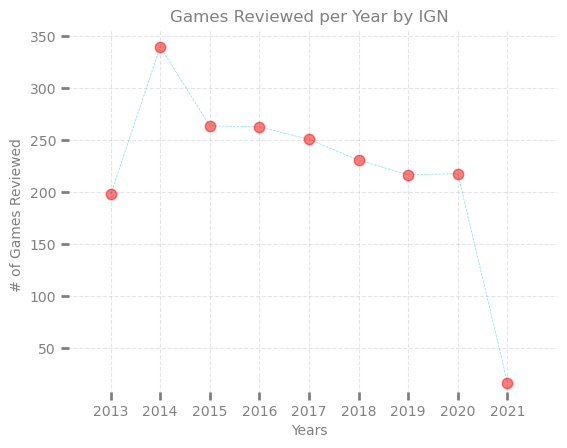

In [4]:
plt.style.use('default')

df[['year', 'rating', 'comment_count']].groupby('year').count().plot(legend = False, 
                                fontsize = 10, style = ['c--','r.'], lw = 0.5, 
                                alpha = 0.5, markersize = 15, xlim = (2012, 2022))


_ = plt.xticks(range(2013, 2022))
_ = plt.xlabel("Years", size = 10, color = 'grey')
_ = plt.ylabel("# of Games Reviewed", size = 10, color = 'grey')

# Remove border 
for spine in plt.gca().spines.values():
    spine.set_visible(False)

_ = plt.title("Games Reviewed per Year by IGN", size = 12, color = 'grey')
_ = plt.grid(color = 'grey', linestyle = '--')
_ = plt.tick_params(direction='in', length=6, width=2, colors='grey',
                   grid_color='gray', grid_alpha=0.2)

# Save image
plt.savefig('../img/game_reviewed.png')

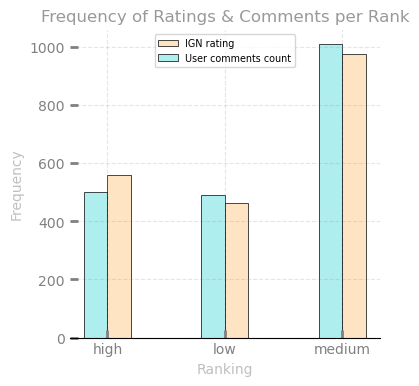

In [5]:
# Show rating vs comments 
# data to plot 
rating = df[['rate_rank', 'comment_count']].groupby('rate_rank').count().reset_index()
comments = df[['rating', 'comment_rank']].groupby('comment_rank').count().reset_index()

# Figure
fig, ax = plt.subplots(figsize = (4, 4))

# Rating figure
ax.bar(rating.rate_rank, rating.comment_count, color = 'bisque', 
       alpha = 1, width = 0.2, align = 'edge', edgecolor = 'black',
       linewidth = 0.5, label = "IGN rating")

# Comment figure
ax.bar(comments.comment_rank, comments.rating, color = 'paleturquoise', 
       alpha = 1, width = -0.2 , align = 'edge', edgecolor = 'black', 
       linewidth = 0.5, label = "User comments count")


# Remove border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Make bottom spine visible 
plt.gca().spines['bottom'].set_visible(True)

# Grid set up
_ = plt.tick_params(direction='in', length=6, width=2, colors='grey',
                   grid_color='gray', grid_alpha=0.2)
_ = plt.grid(color = 'grey', linestyle = '--')



# Other axis info 
ax.legend(loc = 'upper center', fontsize = 'x-small')
ax.set_title("Frequency of Ratings & Comments per Rank", color = 'grey', alpha = 0.8)
ax.set_xlabel("Ranking", color = 'grey', alpha = 0.5)
ax.set_ylabel("Frequency", color = 'grey', alpha = 0.5)

# Save image
plt.savefig('../img/nrating_and_ncomment.png')

In [6]:
# Comments vs Ranking 
rated_low = df['comment_count'][df['rate_rank'] == 'low']
rated_medium = df['comment_count'][df['rate_rank'] == 'medium']
rated_high = df['comment_count'][df['rate_rank'] == 'high']

In [9]:
# Create a sample of means 
sample_low_mean = []
sample_medium_mean = []
sample_high_mean = []

for _ in range(5000):
    sample_low_mean.append(np.random.choice(rated_low, 100).mean())
    sample_medium_mean.append(np.random.choice(rated_medium, 100).mean())
    sample_high_mean.append(np.random.choice(rated_high, 100).mean())
    
sample_low_mean = np.array(sample_low_mean)
sample_medium_mean = np.array(sample_medium_mean)
sample_high_mean = np.array(sample_high_mean)

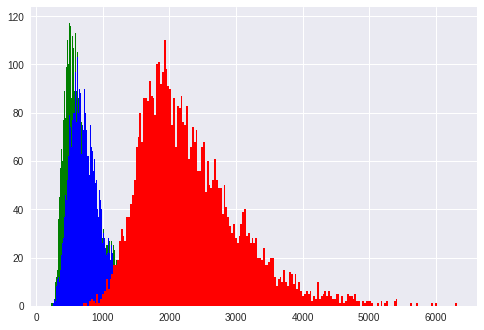

In [10]:
fig, ax = plt.subplots()

_ = ax.hist(sample_low_mean, bins = 200, color = 'green')
_ = ax.hist(sample_medium_mean, bins = 200, color = 'blue')
_ = ax.hist(sample_high_mean, bins = 200, color = 'red')

# plt.tight_layout()

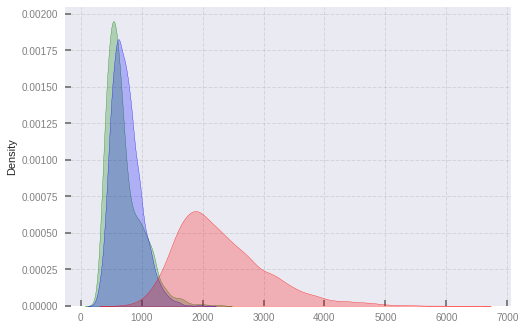

In [15]:
# Draw the density plot
_ = sns.kdeplot(sample_low_mean, shade = True, color = 'green', legend = True)
_ = sns.kdeplot(sample_medium_mean, shade = True, color = 'blue')
_ = sns.kdeplot(sample_high_mean, shade = True, color = 'red')

# Remove border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Make bottom spine visible 
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Grid set up
_ = plt.tick_params(direction='in', length=6, width=2, colors='grey',
                   grid_color='gray', grid_alpha=0.2)
_ = plt.grid(color = 'grey', linestyle = '--')


In [16]:
from scipy.stats import stats

def t_test(arr1, arr2):
    return stats.ttest_ind(arr1, arr2)

In [17]:
# Low vs High 
t_test(sample_low_mean, sample_high_mean)

Ttest_indResult(statistic=-142.39734240718153, pvalue=0.0)

In [18]:
# Low vs Medium
t_test(sample_low_mean, sample_medium_mean)

Ttest_indResult(statistic=-7.933550302181434, pvalue=2.357812955388537e-15)

In [19]:
# Medium vs High 
t_test(sample_medium_mean, sample_high_mean)

Ttest_indResult(statistic=-141.89190035933223, pvalue=0.0)

    [H0] There is no difference in conversations between high, medium and low rated games. 
    [H1] There is a difference in conversations between high, medium and low rated games. 

# Mannwhitneyu Test

### Test done with IGN Ranks as categorical and comments as continuous 

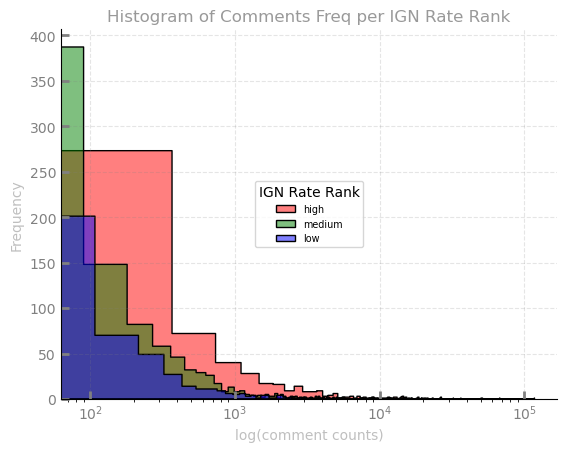

In [158]:
# Data distribution 
fig, ax = plt.subplots()

# Draw plot 
sns.histplot(df[df['rate_rank'] == 'high'], x = 'comment_count', color = 'red', element = 'step', 
             ax = ax, alpha = 0.5, edgecolor = 'black')
sns.histplot(df[df['rate_rank'] == 'medium'], x = 'comment_count', color = 'green', element = 'step', 
             ax = ax, alpha = 0.5, edgecolor = 'black')
sns.histplot(df[df['rate_rank'] == 'low'], x = 'comment_count', color = 'blue', element = 'step', 
             ax = ax, alpha = 0.5, edgecolor = 'black')
# ax manipulation
ax.set_xscale('log')
ax.set_title("Histogram of Comments Freq per IGN Rate Rank", color = 'grey', alpha = 0.8)
ax.set_xlabel("log(comment counts)", color = 'grey', alpha = 0.5)
ax.set_ylabel("Frequency", color = 'grey', alpha = 0.5)

# plt manipulation
plt.legend(title = "IGN Rate Rank", labels = ['high', 'medium', 'low'], 
           loc = 'center', fontsize = 'x-small')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Grid set up
_ = plt.tick_params(direction='in', length=6, width=2, colors='grey',
                   grid_color='gray', grid_alpha=0.2)
_ = plt.grid(linestyle = '--')

# Save image
plt.savefig('../img/ign_rank_ncomment.png')

In [91]:
# Get all p values using mannwhitneyu test  
pvalue_ignrated_lvsh = stats.mannwhitneyu(rated_low, rated_high)[1]
pvalue_ignrated_lvsm = stats.mannwhitneyu(rated_low, rated_medium)[1]
pvalue_ignrated_hvsm = stats.mannwhitneyu(rated_high, rated_medium)[1]

In [94]:
pvalue_ignrated_hvsm

9.620259098086877e-18

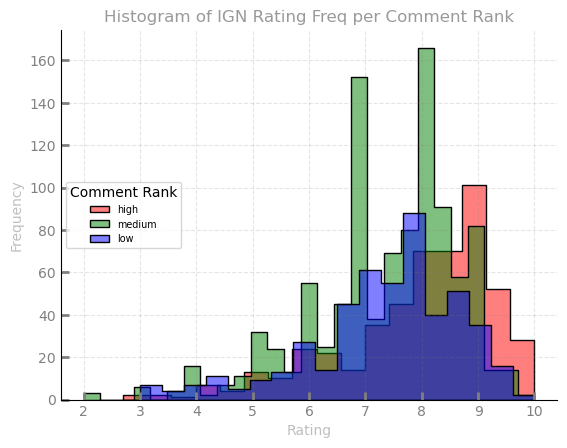

In [153]:
# Data distribution 
fig, ax = plt.subplots()

# Draw plot 
sns.histplot(df[df['comment_rank'] == 'high'], x = 'rating', color = 'red', element = 'step', 
             ax = ax, alpha = 0.5, edgecolor = 'black')
sns.histplot(df[df['comment_rank'] == 'medium'], x = 'rating', color = 'green', element = 'step', 
             ax = ax, alpha = 0.5, edgecolor = 'black')
sns.histplot(df[df['comment_rank'] == 'low'], x = 'rating', color = 'blue', element = 'step', 
             ax = ax, alpha = 0.5, edgecolor = 'black')


# ax manipulation
#ax.set_xscale('log')
ax.set_title("Histogram of IGN Rating Freq per Comment Rank", color = 'grey', alpha = 0.8)
ax.set_xlabel("Rating", color = 'grey', alpha = 0.5)
ax.set_ylabel("Frequency", color = 'grey', alpha = 0.5)

# plt manipulation
plt.legend(title = "Comment Rank", labels = ['high', 'medium', 'low'], 
          loc = 'center left', fontsize = 'x-small')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Grid set up
_ = plt.tick_params(direction='in', length=6, width=2, colors='grey',
                   grid_color='gray', grid_alpha=0.2)
_ = plt.grid(linestyle = '--')

# Save image
plt.savefig('../img/comment_rank_ignrating.png')

In [31]:
print(plh, plm, pmh)

8.098164780625171e-15 0.2641827192273929 9.620259098086877e-18


### Pvalue table
||low vs high| low vs medium| medium vs high|
|-|-----------|--------------|---------------|
|**IGN Ranks**|0.00|<font color = 'red'>0.26</font>|0.00|
|**Comment Ranks**|0.00|0.26|0.00|

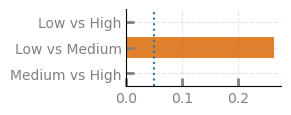

In [157]:
fig, ax = plt.subplots(figsize = (2, 1))
sns.barplot(y = ['Low vs High', 'Low vs Medium', 'Medium vs High'], x = [plh, plm, pmh], 
            orient = "h", ax = ax)

ax.axvline(0.05, ls = ':', label = 'pvalue')

# plt manipulation
#plt.legend(labels = ['p-value'], fontsize = 'xx-small')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Grid set up
_ = plt.tick_params(direction='in', length=6, width=2, colors='grey',
                   grid_color='gray', grid_alpha=0.2)
_ = plt.grid(linestyle = '--')

In [116]:
plot(4)

NameError: name 'plot' is not defined